In [2]:
import larch, numpy, pandas, os

In [3]:
import larch.exampville

In [4]:
skims = larch.OMX( larch.exampville.files.skims, mode='r' )
skims

<larch.OMX> ⋯/exampville_skims.omx
 |  shape:(40, 40)
 |  data:
 |    AUTO_COST    (float64)
 |    AUTO_DIST    (float64)
 |    AUTO_TIME    (float64)
 |    BIKE_TIME    (float64)
 |    TRANSIT_FARE (float64)
 |    TRANSIT_IVTT (float64)
 |    TRANSIT_OVTT (float64)
 |    WALK_DIST    (float64)
 |    WALK_TIME    (float64)
 |  lookup:
 |    TAZ_AREA_TYPE (40 |S3)
 |    TAZ_ID        (40 int64)

In [5]:
hh = pandas.read_csv( larch.exampville.files.hh )
pp = pandas.read_csv( larch.exampville.files.person )
tour = pandas.read_csv( larch.exampville.files.tour )

In [6]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            5000 non-null   float64
 1   Y            5000 non-null   float64
 2   INCOME       5000 non-null   float64
 3   N_VEHICLES   5000 non-null   int64  
 4   HHSIZE       5000 non-null   int64  
 5   geometry     5000 non-null   object 
 6   HOMETAZ      5000 non-null   int64  
 7   HHID         5000 non-null   int64  
 8   N_TRIPS      5000 non-null   int64  
 9   N_TRIPS_HBW  5000 non-null   int64  
 10  N_TRIPS_HBO  5000 non-null   int64  
 11  N_TRIPS_NHB  5000 non-null   int64  
 12  N_WORKERS    5000 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 507.9+ KB


In [7]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12349 entries, 0 to 12348
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PERSONID       12349 non-null  int64
 1   HHID           12349 non-null  int64
 2   HHIDX          12349 non-null  int64
 3   AGE            12349 non-null  int64
 4   WORKS          12349 non-null  int64
 5   N_WORK_TOURS   12349 non-null  int64
 6   N_OTHER_TOURS  12349 non-null  int64
 7   N_TOURS        12349 non-null  int64
 8   N_TRIPS        12349 non-null  int64
 9   N_TRIPS_HBW    12349 non-null  int64
 10  N_TRIPS_HBO    12349 non-null  int64
 11  N_TRIPS_NHB    12349 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [8]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TOURID       20739 non-null  int64
 1   HHID         20739 non-null  int64
 2   PERSONID     20739 non-null  int64
 3   DTAZ         20739 non-null  int64
 4   TOURMODE     20739 non-null  int64
 5   TOURPURP     20739 non-null  int64
 6   N_STOPS      20739 non-null  int64
 7   N_TRIPS      20739 non-null  int64
 8   N_TRIPS_HBW  20739 non-null  int64
 9   N_TRIPS_HBO  20739 non-null  int64
 10  N_TRIPS_NHB  20739 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [9]:
tour.TOURPURP.statistics()

┣               n: 20739
┣         minimum: 1
┣         maximum: 2
┣          median: 2.0
┣       histogram: <xmle.Elem 'div' with 1 children>
┣            mean: 1.6352765321375187
┣           stdev: 0.48135253178190196
┣           zeros: 0
┣       positives: 20739
┣       negatives: 0
┣ nonzero_minimum: 1
┣ nonzero_maximum: 2
┣    nonzero_mean: 1.6352765321375187
┣   nonzero_stdev: 0.48135253178190196

In [10]:
df = tour[tour.TOURPURP == 1]

In [11]:
df = df.merge(hh, on='HHID').merge(pp, on=('HHID', 'PERSONID'))

In [12]:
df["HOMETAZi"] = df["HOMETAZ"] - 1
df["DTAZi"] = df["DTAZ"] - 1

In [13]:
df = df.join(
    skims.get_rc_dataframe(
        df["HOMETAZi"], df["DTAZi"],
    )
)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7563
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TOURID         7564 non-null   int64  
 1   HHID           7564 non-null   int64  
 2   PERSONID       7564 non-null   int64  
 3   DTAZ           7564 non-null   int64  
 4   TOURMODE       7564 non-null   int64  
 5   TOURPURP       7564 non-null   int64  
 6   N_STOPS        7564 non-null   int64  
 7   N_TRIPS_x      7564 non-null   int64  
 8   N_TRIPS_HBW_x  7564 non-null   int64  
 9   N_TRIPS_HBO_x  7564 non-null   int64  
 10  N_TRIPS_NHB_x  7564 non-null   int64  
 11  X              7564 non-null   float64
 12  Y              7564 non-null   float64
 13  INCOME         7564 non-null   float64
 14  N_VEHICLES     7564 non-null   int64  
 15  HHSIZE         7564 non-null   int64  
 16  geometry       7564 non-null   object 
 17  HOMETAZ        7564 non-null   int64  
 18  N_TRIPS_

In [15]:
# For clarity, we can define numbers as names for modes
DA = 1
SR = 2
Walk = 3
Bike = 4
Transit = 5

In [16]:
dfs = larch.DataFrames(
    co=df,
    alt_codes=[DA,SR,Walk,Bike,Transit],
    alt_names=['DA','SR','Walk','Bike','Transit'],
    ch_name='TOURMODE',
)

In [17]:
m = larch.Model(dataservice=dfs)
m.title = "Exampville Work Tour Mode Choice v1"

In [18]:
from larch import P, X

In [19]:
P('NamedParameter')

P.NamedParameter

In [20]:
X.NamedDataValue

X.NamedDataValue

In [21]:
P('Named Parameter')

P('Named Parameter')

In [22]:
X("log(INCOME)")

X('log(INCOME)')

In [23]:
P.InVehTime * X.AUTO_TIME + P.Cost * X.AUTO_COST

P.InVehTime * X.AUTO_TIME + P.Cost * X.AUTO_COST

In [24]:
P.ASC + P.InVehTime * X.AUTO_TIME + P.Cost * X.AUTO_COST

P.ASC + P.InVehTime * X.AUTO_TIME + P.Cost * X.AUTO_COST

In [25]:
m.utility_co[DA] = (
        + P.InVehTime * X.AUTO_TIME
        + P.Cost * X.AUTO_COST # dollars per mile
)

m.utility_co[SR] = (
        + P.ASC_SR
        + P.InVehTime * X.AUTO_TIME
        + P.Cost * (X.AUTO_COST * 0.5) # dollars per mile, half share
        + P("LogIncome:SR") * X("log(INCOME)")
)

m.utility_co[Walk] = (
        + P.ASC_Walk
        + P.NonMotorTime * X.WALK_TIME
        + P("LogIncome:Walk") * X("log(INCOME)")
)

m.utility_co[Bike] = (
        + P.ASC_Bike
        + P.NonMotorTime * X.BIKE_TIME
        + P("LogIncome:Bike") * X("log(INCOME)")
)

m.utility_co[Transit] = (
        + P.ASC_Transit
        + P.InVehTime * X.TRANSIT_IVTT
        + P.OutVehTime * X.TRANSIT_OVTT
        + P.Cost * X.TRANSIT_FARE
        + P("LogIncome:Transit") * X('log(INCOME)')
)

In [26]:
Car = m.graph.new_node(parameter='Mu:Car', children=[DA,SR], name='Car')
NonMotor = m.graph.new_node(parameter='Mu:NonMotor', children=[Walk,Bike], name='NonMotor')
Motor = m.graph.new_node(parameter='Mu:Motor', children=[Car,Transit], name='Motor')

In [27]:
m.graph

In [28]:
m.choice_co_code = 'TOURMODE'

In [29]:
m.availability_co_vars = {
    DA: 'AGE >= 16',
    SR: 1,
    Walk: 'WALK_TIME < 60',
    Bike: 'BIKE_TIME < 60',
    Transit: 'TRANSIT_FARE>0',
}

In [30]:
m.load_data()

In [31]:
m.dataframes.choice_avail_summary()

,name,chosen,available
1,DA,6052.0,7564
2,SR,810.0,7564
3,Walk,196.0,4179
4,Bike,72.0,7564
5,Transit,434.0,4199
< Total All Alternatives >,,7564.0,


In [32]:
m.dataframes.data_co.statistics()

AUTO_COST,7564,0.194926,4.30796,1.00945,"<div class=""figure"" metadata=""gASV9QEAAAAAAAB9lCiMC2Jpbl9oZWlnaHRzlIwcbnVtcHkuY29yZS5fbXVsdGlhcnJheV91bWF0aJSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSw2FlGgFjAVkdHlwZZSTlIwCaTiUSwBLAYeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiiUNoDAYAAAAAAAAGBQAAAAAAAK8FAAAAAAAAcwMAAAAAAADcAgAAAAAAAE4CAAAAAAAAyQEAAAAAAAC3AAAAAAAAABUBAAAAAAAAYQAAAAAAAAAgAAAAAAAAABUAAAAAAAAAAwAAAAAAAACUdJRijAliaW5fZWRnZXOUaARoB0sAhZRoCYeUUpQoSwFLDoWUaA6MAmY4lEsASwGHlFKUKEsDaBJOTk5K/////0r/////SwB0lGKJQ3An0omtUvPIP4sLm2OtXOA/jKLTG4Z86j/GHAZqL07yP0doIsYbXvc/x7M+Ighu/D+kfy0/+r4AQGSlO23wRgNAJMtJm+bOBUDk8FfJ3FYIQKQWZvfS3gpAZTx0JclmDUAlYoJTv+4PQPNDyMBaOxFAlHSUYowRemVyb3NfYXJlX2Ryb3BwZWSUiYwScmFuZ2VfaXNfdHJ1bmNhdGVklEsAdS4="" range_is_truncated=""0"" style=""min-width:Truein"" zeros_are_dropped=""False"">",1.20601,0.754844,0,7564,0,0.194926,4.30796,1.20601,0.754844
AUTO_COST*(0.5),7564,0.0974628,2.15398,0.504724,"<div class=""figure"" metadata=""gASV9QEAAAAAAAB9lCiMC2Jpbl9oZWlnaHRzlIwcbnVtcHkuY29yZS5fbXVsdGlhcnJheV91bWF0aJSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSw2FlGgFjAVkdHlwZZSTlIwCaTiUSwBLAYeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiiUNoDAYAAAAAAAAGBQAAAAAAAK8FAAAAAAAAcwMAAAAAAADcAgAAAAAAAE4CAAAAAAAAyQEAAAAAAAC3AAAAAAAAABUBAAAAAAAAYQAAAAAAAAAgAAAAAAAAABUAAAAAAAAAAwAAAAAAAACUdJRijAliaW5fZWRnZXOUaARoB0sAhZRoCYeUUpQoSwFLDoWUaA6MAmY4lEsASwGHlFKUKEsDaBJOTk5K/////0r/////SwB0lGKJQ3An0omtUvO4P4sLm2OtXNA/jKLTG4Z82j/GHAZqL07iP0doIsYbXuc/x7M+Ighu7D+kfy0/+r7wP2SlO23wRvM/JMtJm+bO9T/k8FfJ3Fb4P6QWZvfS3vo/ZTx0Jclm/T8lYoJTv+7/P/NDyMBaOwFAlHSUYowRemVyb3NfYXJlX2Ryb3BwZWSUiYwScmFuZ2VfaXNfdHJ1bmNhdGVklEsAdS4="" range_is_truncated=""0"" style=""min-width:Truein"" zeros_are_dropped=""False"">",0.603005,0.377422,0,7564,0,0.0974628,2.15398,0.603005,0.377422
AUTO_TIME,7564,0.930008,29.4415,7.61571,"<div class=""figure"" metadata=""gASV9QEAAAAAAAB9lCiMC2Jpbl9oZWlnaHRzlIwcbnVtcHkuY29yZS5fbXVsdGlhcnJheV91bWF0aJSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSw2FlGgFjAVkdHlwZZSTlIwCaTiUSwBLAYeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiiUNoMQMAAAAAAACqBQAAAAAAAIMFAAAAAAAA9wUAAAAAAABgAwAAAAAAAGoCAAAAAAAAXwEAAAAAAAAjAQAAAAAAAJsAAAAAAAAAMgAAAAAAAAAWAAAAAAAAAAYAAAAAAAAAAgAAAAAAAACUdJRijAliaW5fZWRnZXOUaARoB0sAhZRoCYeUUpQoSwFLDoWUaA6MAmY4lEsASwGHlFKUKEsDaBJOTk5K/////0r/////SwB0lGKJQ3AI1vDNoMLtPzuX2ldR/AhAenwcPv1DFUBXrUvQ0QkeQBpvPTHTZyNAiAdVer3KJ0D2n2zDpy0sQDIcQgZJSDBAaejNKr55MkCgtFlPM6s0QNeA5XOo3DZADk1xmB0OOUBGGf28kj87QHzliOEHcT1AlHSUYowRemVyb3NfYXJlX2Ryb3BwZWSUiYwScmFuZ2VfaXNfdHJ1bmNhdGVklEsAdS4="" range_is_truncated=""0"" style=""min-width:Truein"" zeros_are_dropped=""False"">",8.22287,4.58134,0,7564,0,0.930008,29.4415,8.22287,4.58134
BIKE_TIME,7564,2.78465,52.2321,13.5864,"<div class=""figure"" metadata=""gASV9QEAAAAAAAB9lCiMC2Jpbl9oZWlnaHRzlIwcbnVtcHkuY29yZS5fbXVsdGlhcnJheV91bWF0aJSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSw2FlGgFjAVkdHlwZZSTlIwCaTiUSwBLAYeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiiUNoGwQAAAAAAACcBQAAAAAAAMYFAAAAAAAAbAMAAAAAAABqAwAAAAAAAEcCAAAAAAAAEAIAAAAAAABCAQAAAAAAAMMAAAAAAAAAfwAAAAAAAAA9AAAAAAAAACAAAAAAAAAAAQAAAAAAAACUdJRijAliaW5fZWRnZXOUaARoB0sAhZRoCYeUUpQoSwFLDoWUaA6MAmY4lEsASwGHlFKUKEsDaBJOTk5K/////0r/////SwB0lGKJQ3DIxKiI90YGQDyAscRqWhpACk+H4qzIJED13bViJGQsQHA2cvHN/zFA5n2JsYnNNUBcxaBxRZs5QNIMuDEBaT1AJKrneF6bQEDeTfNYPIJCQJrx/jgaaURAVJUKGfhPRkAQORb51TZIQMrcIdmzHUpAlHSUYowRemVyb3NfYXJlX2Ryb3BwZWSUiYwScmFuZ2VfaXNfdHJ1bmNhdGVklEsAdS4="" range_is_truncated=""0"" style=""min-width:Truein"" zeros_are_dropped=""False"">",15.9827,9.29732,0,7564,0,2.78465,52.2321,15.9827,9.29732
TRANSIT_FARE,7564,0,2.5,2.5,Histograms are purple if the data is represented as discrete values.,1.38782,1.24238,3365,4199,0,2.5,2.5,2.5,0
TRANSIT_IVTT,7564,0,12.1668,1.44769,"<div class=""figure"" metadata=""gASV9QEAAAAAAAB9lCiMC2Jpbl9oZWlnaHRzlIwcbnVtcHkuY29yZS5fbXVsdGlhcnJheV91bWF0aJSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSw2FlGgFjAVkdHlwZZSTlIwCaT

In [33]:
result = m.maximize_loglike(method='slsqp')

,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
ASC_Bike,-0.257901,0.0,0.0,-inf,inf,0,,-0.257901
ASC_SR,1.423159,0.0,0.0,-inf,inf,0,,1.423159
ASC_Transit,6.754794,0.0,0.0,-inf,inf,0,,6.754794
ASC_Walk,8.621893,0.0,0.0,-inf,inf,0,,8.621893
Cost,-0.175720,0.0,0.0,-inf,inf,0,,-0.175720
InVehTime,-0.123723,0.0,0.0,-inf,inf,0,,-0.123723
LogIncome:Bike,-0.196995,0.0,0.0,-inf,inf,0,,-0.196995
LogIncome:SR,-0.193845,0.0,0.0,-inf,inf,0,,-0.193845
LogIncome:Transit,-0.557177,0.0,0.0,-inf,inf,0,,-0.557177
LogIncome:Walk,-0.522822,0.0,0.0,-inf,inf,0,,-0.522822


In [34]:
m.calculate_parameter_covariance()

In [35]:
m.parameter_summary()

Parameter              Value  Std Err  t Stat  Null Value
     ASC_Bike            -0.2579     1.34   -0.19         0.0
       ASC_SR              1.423     1.00    1.42         0.0
  ASC_Transit              6.755     2.06    3.27         0.0
     ASC_Walk              8.622     1.14    7.57         0.0
         Cost            -0.1757    0.120   -1.47         0.0
    InVehTime            -0.1237   0.0292   -4.24         0.0
    LogIncome      Bike   -0.197    0.124   -1.59         0.0
                     SR  -0.1938    0.135   -1.43         0.0
                Transit  -0.5572    0.169   -3.29         0.0
                   Walk  -0.5228    0.100   -5.21         0.0
           Mu       Car   0.2593    0.181   -4.10         1.0
                  Motor   0.8017    0.201   -0.99         1.0
               NonMotor   0.8538    0.112   -1.30         1.0
 NonMotorTime            -0.2656   0.0163  -16.29         0.0
   OutVehTime            -0.2548   0.0646   -3.95         0.0

In [36]:
report = larch.Reporter(title=m.title)

In [37]:
report << '# Parameter Summary' << m.parameter_summary()

<xmle.Elem 'div' with 3 children>

In [38]:
report << "# Estimation Statistics" << m.estimation_statistics()

<xmle.Elem 'div' with 5 children>

In [39]:
report << "# Utility Functions" << m.utility_functions()

alt,formula
1,+ P.InVehTime * X.AUTO_TIME + P.Cost * X.AUTO_COST
2,+ P.ASC_SR + P.InVehTime * X.AUTO_TIME + P.Cost * X('AUTO_COST*(0.5)') + P('LogIncome:SR') * X('log(INCOME)')
3,+ P.ASC_Walk + P.NonMotorTime * X.WALK_TIME + P('LogIncome:Walk') * X('log(INCOME)')
4,+ P.ASC_Bike + P.NonMotorTime * X.BIKE_TIME + P('LogIncome:Bike') * X('log(INCOME)')
5,+ P.ASC_Transit + P.InVehTime * X.TRANSIT_IVTT + P.OutVehTime * X.TRANSIT_OVTT + P.Cost * X.TRANSIT_FARE + P('LogIncome:Transit') * X('log(INCOME)')


In [40]:
report.save(
    '/tmp/exampville_mode_choice.html',
    overwrite=True,
    metadata=m,
)

'/tmp/exampville_mode_choice.html'

In [41]:
import larch, numpy, pandas, os

In [42]:
import larch.exampville
hh = pandas.read_csv( larch.exampville.files.hh )
pp = pandas.read_csv( larch.exampville.files.person )
tour = pandas.read_csv( larch.exampville.files.tour )
skims = larch.OMX( larch.exampville.files.skims, mode='r' )

In [43]:
m = larch.read_metadata('/tmp/exampville_mode_choice.html')

In [44]:
raw = tour.merge(hh, on='HHID').merge(pp, on=('HHID', 'PERSONID'))
raw["HOMETAZi"] = raw["HOMETAZ"] - 1
raw["DTAZi"] = raw["DTAZ"] - 1
raw = raw[raw.TOURPURP == 1]
raw = raw.join(
    skims.get_rc_dataframe(
        raw.HOMETAZi, raw.DTAZi,
    )
)

In [45]:
# For clarity, we can define numbers as names for modes
DA = 1
SR = 2
Walk = 3
Bike = 4
Transit = 5

In [46]:
dfs = larch.DataFrames(
    co=raw,
    alt_codes=[DA,SR,Walk,Bike,Transit],
    alt_names=['DA','SR','Walk','Bike','Transit'],
    ch_name='TOURMODE',
)

m.dataservice = dfs

In [47]:
logsums = pandas.DataFrame(
    data=0.0,
    index=raw.index,
    columns=skims.TAZ_ID
)

In [48]:
for destination_i, dtaz in enumerate(logsums.columns):

    # Get the LOS data for this destination
    new_data = skims.get_rc_dataframe(
        raw.HOMETAZi, destination_i,
    )

    # Write this data into the model's dataservice,
    # overwriting the existing values.
    dfs.data_co[new_data.columns] = new_data

    # Run the pre-processing to create the arrays
    # needed for computation.
    m.load_data()

    # Lastly, compute the logsums and save them
    # to the new DataFrame.
    logsums[dtaz] = m.logsums()

In [49]:
logsums.head()

TAZ_ID,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,-2.935713,-2.660536,-1.745670,-2.229338,-2.403182,-1.624226,-2.689859,-2.704618,-3.258728,-2.718739,...,-1.702316,-1.717786,-2.340960,-2.760617,-1.029280,-2.249790,-2.048407,-2.160306,-2.286868,-1.959773
1,-2.935713,-2.660536,-1.745670,-2.229338,-2.403182,-1.624226,-2.689859,-2.704618,-3.258728,-2.718739,...,-1.702316,-1.717786,-2.340960,-2.760617,-1.029280,-2.249790,-2.048407,-2.160306,-2.286868,-1.959773
3,-2.935713,-2.660536,-1.745670,-2.229338,-2.403182,-1.624226,-2.689859,-2.704618,-3.258728,-2.718739,...,-1.702316,-1.717786,-2.340960,-2.760617,-1.029280,-2.249790,-2.048407,-2.160306,-2.286868,-1.959773
7,-3.046216,-2.770092,-1.823420,-2.320433,-2.494165,-1.705379,-2.785956,-2.806232,-3.365641,-2.831113,...,-1.784256,-1.797553,-2.430906,-2.863390,-1.100512,-2.343775,-2.133362,-2.247115,-2.380724,-2.047770
10,-3.051758,-2.775558,-1.827227,-2.324878,-2.498529,-1.709190,-2.790614,-2.811234,-3.370947,-2.836754,...,-1.788103,-1.801300,-2.435210,-2.868381,-1.103854,-2.348454,-2.137388,-2.251244,-2.385223,-2.052071


In [50]:
logsums.to_pickle('/tmp/logsums.pkl.gz')

In [51]:
import larch, numpy, pandas, os
from larch import P, X

In [52]:
import larch.exampville

hh = pandas.read_csv( larch.exampville.files.hh )
pp = pandas.read_csv( larch.exampville.files.person )
tour = pandas.read_csv( larch.exampville.files.tour )
skims = larch.OMX( larch.exampville.files.skims, mode='r' )

In [53]:
emp = pandas.read_csv(larch.exampville.files.employment, index_col='TAZ')
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   NONRETAIL_EMP  40 non-null     int64
 1   RETAIL_EMP     40 non-null     int64
 2   TOTAL_EMP      40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [54]:
logsums = pandas.read_pickle('/tmp/logsums.pkl.gz')

In [55]:
co = tour.merge(hh, on='HHID').merge(pp, on=('HHID', 'PERSONID'))
co["HOMETAZi"] = co["HOMETAZ"] - 1
co["DTAZi"] = co["DTAZ"] - 1
co = co[co.TOURPURP == 1]
co.index.name = 'CASE_ID'

In [56]:
distance = pandas.DataFrame(
    skims.AUTO_DIST[:][co["HOMETAZi"], :],
    index=co.index,
    columns=skims.TAZ_ID,
)

In [57]:
ca = pandas.concat([
    distance.stack().rename("distance"),
    logsums.stack().rename("logsum"),
], axis=1)

In [58]:
ca.head()

distance    logsum
CASE_ID TAZ_ID                    
0       1       8.286090 -2.935713
        2       8.256698 -2.660536
        3       2.928829 -1.745670
        4       5.502758 -2.229338
        5       5.882862 -2.403182

In [59]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   NONRETAIL_EMP  40 non-null     int64
 1   RETAIL_EMP     40 non-null     int64
 2   TOTAL_EMP      40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [60]:
ca = ca.join(emp, on='TAZ_ID')

In [61]:
area_type = pandas.Series(
    skims.TAZ_AREA_TYPE[:],
    index=skims.TAZ_ID[:],
    name ='TAZ_AREA_TYPE',
).astype('category')

In [62]:
ca = ca.join(area_type, on='TAZ_ID')

In [63]:
dfs = larch.DataFrames(
    co=co,
    ca=ca,
    alt_codes=skims.TAZ_ID,
    alt_names=['TAZ{i}' for i in skims.TAZ_ID],
    ch_name='DTAZ',
    av=True,
)

In [64]:
dfs.info(1)

larch.DataFrames:  (not computation-ready)
  n_cases: 7564
  n_alts: 40
  data_ca:
    - distance      (302560 non-null float64)
    - logsum        (302560 non-null float64)
    - NONRETAIL_EMP (302560 non-null int64)
    - RETAIL_EMP    (302560 non-null int64)
    - TOTAL_EMP     (302560 non-null int64)
    - TAZ_AREA_TYPE (302560 non-null category)
  data_co:
    - TOURID        (7564 non-null int64)
    - HHID          (7564 non-null int64)
    - PERSONID      (7564 non-null int64)
    - DTAZ          (7564 non-null int64)
    - TOURMODE      (7564 non-null int64)
    - TOURPURP      (7564 non-null int64)
    - N_STOPS       (7564 non-null int64)
    - N_TRIPS_x     (7564 non-null int64)
    - N_TRIPS_HBW_x (7564 non-null int64)
    - N_TRIPS_HBO_x (7564 non-null int64)
    - N_TRIPS_NHB_x (7564 non-null int64)
    - X             (7564 non-null float64)
    - Y             (7564 non-null float64)
    - INCOME        (7564 non-null float64)
    - N_VEHICLES    (7564 non-null int64)

In [65]:
m = larch.Model(dataservice=dfs)

In [66]:
m.quantity_ca = (
        + P.EmpRetail_HighInc * X('RETAIL_EMP * (INCOME>50000)')
        + P.EmpNonRetail_HighInc * X('NONRETAIL_EMP') * X("INCOME>50000")
        + P.EmpRetail_LowInc * X('RETAIL_EMP') * X("INCOME<=50000")
        + P.EmpNonRetail_LowInc * X('NONRETAIL_EMP') * X("INCOME<=50000")
)

In [67]:
m.quantity_scale = P.Theta

In [68]:
m.utility_ca = (
    + P.logsum * X.logsum
    + P.distance * X.distance
)

In [69]:
m.lock_values(
    EmpRetail_HighInc=0,
    EmpRetail_LowInc=0,
)

In [70]:
m.load_data()

req_data does not request {choice_ca,choice_co,choice_co_code} but choice is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided


In [71]:
m.maximize_loglike()

,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
EmpNonRetail_HighInc,1.363985,0.0,0.0,-inf,inf,0,,1.363985
EmpNonRetail_LowInc,-0.881366,0.0,0.0,-inf,inf,0,,-0.881366
EmpRetail_HighInc,0.000000,0.0,0.0,0.000,0.0,1,,0.000000
EmpRetail_LowInc,0.000000,0.0,0.0,0.000,0.0,1,,0.000000
Theta,0.749371,1.0,1.0,0.001,1.0,0,,0.749371
distance,-0.041811,0.0,0.0,-inf,inf,0,,-0.041811
logsum,1.020790,0.0,0.0,-inf,inf,0,,1.020790


┣          loglike: -25157.72357461649
┣                x: EmpNonRetail_HighInc    1.363985
┃                   EmpNonRetail_LowInc    -0.881366
┃                   EmpRetail_HighInc       0.000000
┃                   EmpRetail_LowInc        0.000000
┃                   Theta                   0.749371
┃                   distance               -0.041811
┃                   logsum                  1.020790
┃                   dtype: float64
┣        tolerance: 1.6901098901897463e-08
┣            steps: array([1., 1., 1., 1., 1.])
┣          message: 'Optimization terminated successfully.'
┣     elapsed_time: datetime.timedelta(microseconds=263914)
┣           method: 'bhhh'
┣          n_cases: 7564
┣ iteration_number: 5
┣          logloss: 3.3259814350365535

In [72]:
m.calculate_parameter_covariance()

In [73]:
m.parameter_summary()

Parameter     Value      Std Err  t Stat  Null Value
 EmpNonRetail_HighInc     1.364        0.256    5.32         0.0
  EmpNonRetail_LowInc   -0.8814       0.0791  -11.14         0.0
    EmpRetail_HighInc         0  fixed value                    
     EmpRetail_LowInc         0  fixed value                    
                Theta    0.7494       0.0152  -16.45         1.0
             distance  -0.04181       0.0107   -3.90         0.0
               logsum     1.021       0.0317   32.16         0.0

In [74]:
m.estimation_statistics()

<xmle.Elem 'div' with 1 children>

In [75]:
m.utility_functions()

+ P.logsum * X.logsum + P.distance * X.distance + P.Theta * log( + exp(P.EmpRetail_HighInc) * X('RETAIL_EMP * (INCOME>50000)') + exp(P.EmpNonRetail_HighInc) * X('NONRETAIL_EMP*(INCOME>50000)') + exp(P.EmpRetail_LowInc) * X('RETAIL_EMP*(INCOME<=50000)') + exp(P.EmpNonRetail_LowInc) * X('NONRETAIL_EMP*(INCOME<=50000)'))


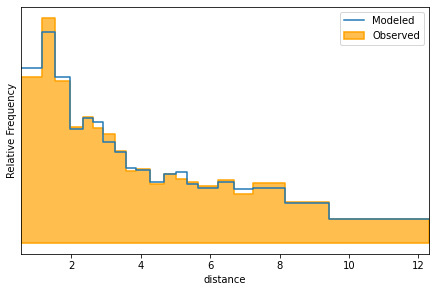

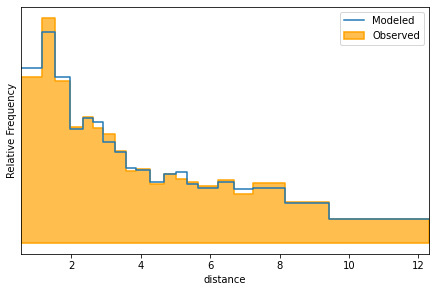

In [76]:
m.distribution_on_idca_variable('distance')

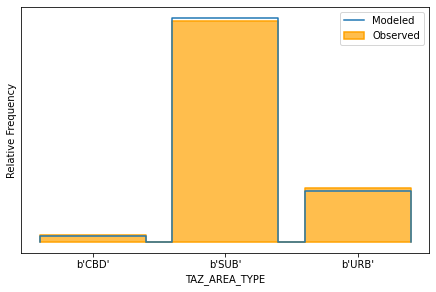

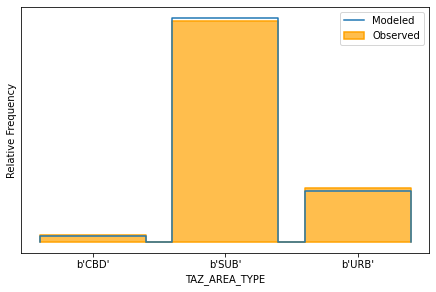

In [77]:
m.distribution_on_idca_variable(
    m.dataservice.data_ca.TAZ_AREA_TYPE
)

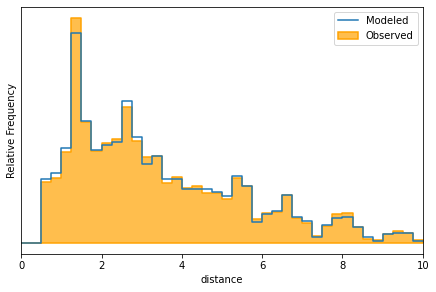

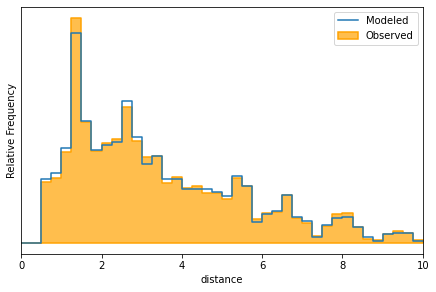

In [78]:
m.distribution_on_idca_variable('distance', bins=40, range=(0,10))

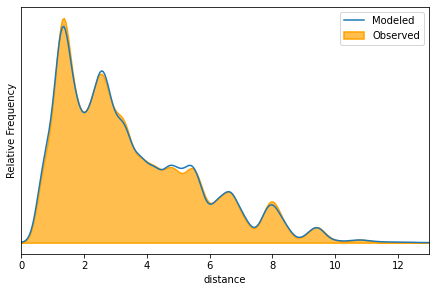

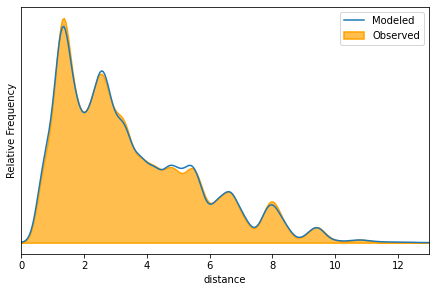

In [79]:
m.distribution_on_idca_variable(
    'distance',
    style='kde',
    range=(0,13),
)

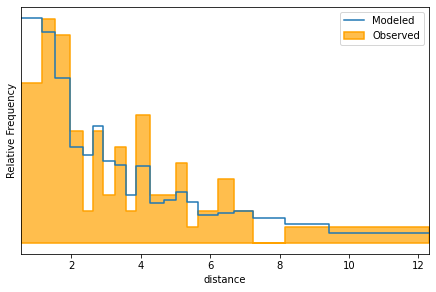

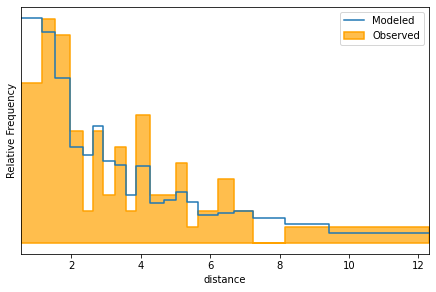

In [80]:
m.distribution_on_idca_variable(
    'distance',
    subselector='INCOME<10000',
)

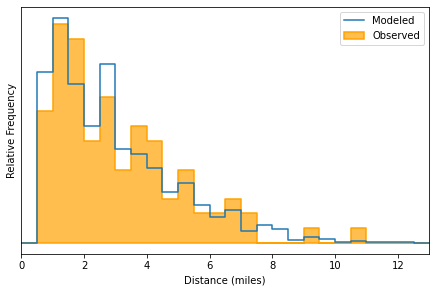

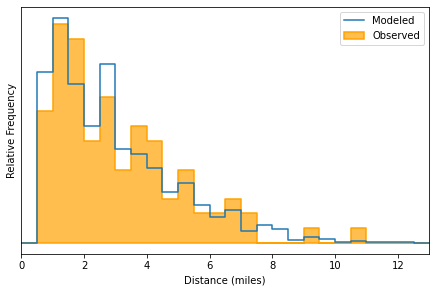

In [81]:
m.distribution_on_idca_variable(
    'distance',
    xlabel="Distance (miles)",
    bins=26,
    subselector='INCOME<10000',
    range=(0,13),
    header='Destination Distance, Very Low Income (<$10k) Households',
)

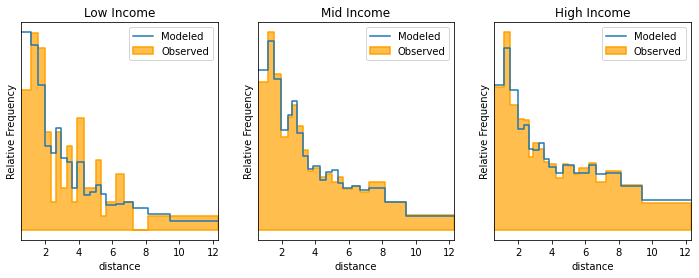

In [82]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(12,4))

income_categories = {
    'Low Income': 'INCOME<10000',
    'Mid Income': '(10000<=INCOME) & (INCOME<50000)',
    'High Income': 'INCOME>=50000',
}

for ax, (inc_title, inc) in zip(axes, income_categories.items()):
    m.distribution_on_idca_variable(
        'distance',
        subselector=inc,
        ax=ax,
        range=(0,13),
    )
    ax.set_title(inc_title)

In [83]:
report = larch.Reporter(title=m.title)

In [84]:
report << '# Parameter Summary' << m.parameter_summary()

<xmle.Elem 'div' with 3 children>

In [85]:
report << "# Estimation Statistics" << m.estimation_statistics()

<xmle.Elem 'div' with 5 children>

In [86]:
report << "# Utility Functions" << m.utility_functions()

+ P.logsum * X.logsum + P.distance * X.distance + P.Theta * log( + exp(P.EmpRetail_HighInc) * X('RETAIL_EMP * (INCOME>50000)') + exp(P.EmpNonRetail_HighInc) * X('NONRETAIL_EMP*(INCOME>50000)') + exp(P.EmpRetail_LowInc) * X('RETAIL_EMP*(INCOME<=50000)') + exp(P.EmpNonRetail_LowInc) * X('NONRETAIL_EMP*(INCOME<=50000)'))


In [87]:
report.save(
    '/tmp/exampville_destination_choice.html',
    overwrite=True,
    metadata=m,
)

'/tmp/exampville_destination_choice.html'